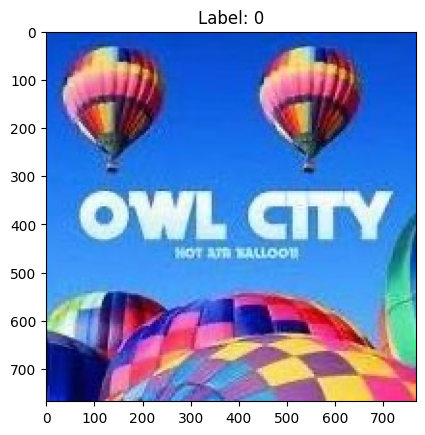

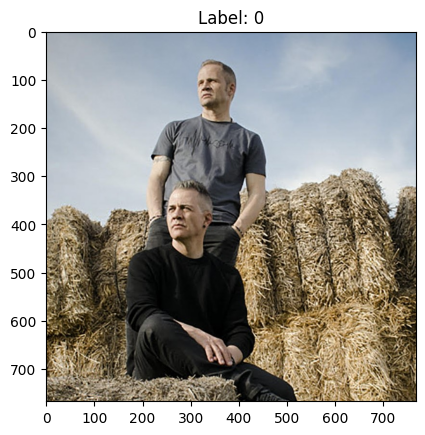

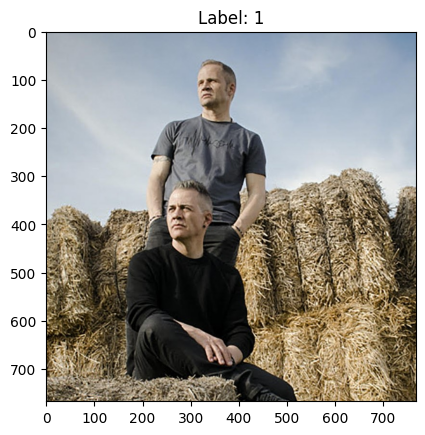

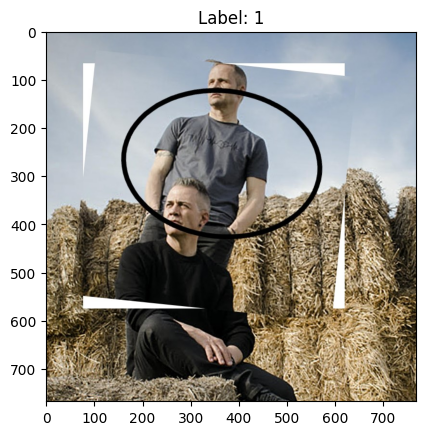

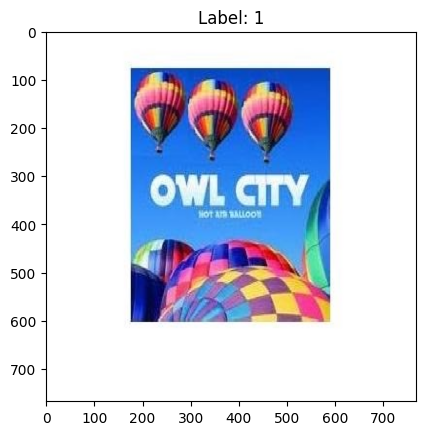

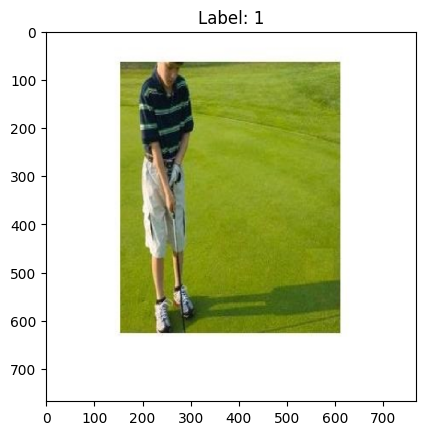

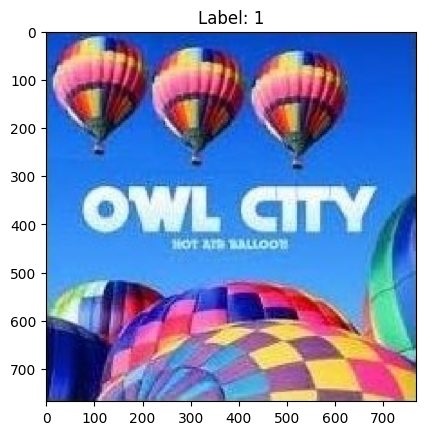

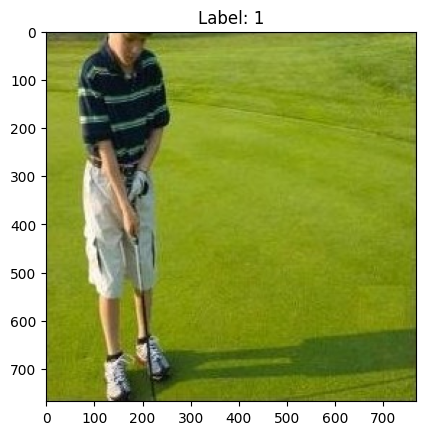

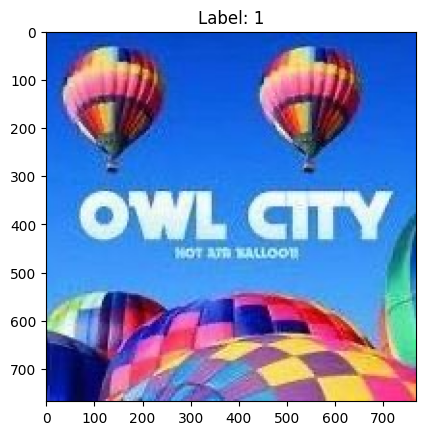

In [83]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Función para cargar y preprocesar imágenes
def load_and_preprocess_image(image_path, target_size=(768, 768)):
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = image.astype('float32') / 255.0
    return image

# Rutas de las imágenes
image_paths = ['680a3140-5be0-46e7-b78f-e12369d9f891.jpeg', "platon-1600-1.jpg", "real.jpg", "copia_1.jpg", 'd3258ec4-424e-4c0d-9ab5-5187a2731051.jpeg', "bafa55e7-95d2-4cfa-8e3d-1636ac9ab74c.jpeg", "pene1.jpg", "pene2.jpg", "Retarde.jpeg"]

images = np.array([load_and_preprocess_image(image_path) for image_path in image_paths])

# Crear etiquetas (0: original, 1: falsificación)
labels = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1])

# Mostrar imágenes y etiquetas
for i in range(len(images)):
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i]}')
    plt.show()


In [84]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test = images[:1], images[1:]
y_train, y_test = labels[:1], labels[1:]

# Crear el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(768, 768, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(180, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=1000, batch_size=1, validation_data=(x_test, y_test))

# Guardar el modelo entrenado
model.save('C:/Proyectos/forgery_detection_model.h5')
print("Modelo guardado como forgery_detection_model.h5")


c:\Users\Fanper\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.0000e+00 - loss: 0.7409 - val_accuracy: 0.1250 - val_loss: 368.2475
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 576.3131
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 727.3512
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 853.5074
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 965.6073
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 1067.0502
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 1158.3740
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0

Modelo guardado como forgery_detection_model.h5


In [85]:
# Cargar el modelo entrenado
loaded_model = tf.keras.models.load_model('C:/Proyectos/forgery_detection_model.h5')

# Hacer predicciones sobre el conjunto de prueba
predictions = loaded_model.predict(x_test)

# Mostrar las predicciones y las etiquetas verdaderas
for i in range(len(predictions)):
    print(f'Predicción: {predictions[i]}, Etiqueta verdadera: {y_test[i]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
Predicción: [0.], Etiqueta verdadera: 0
Predicción: [0.], Etiqueta verdadera: 1
Predicción: [0.], Etiqueta verdadera: 1
Predicción: [0.], Etiqueta verdadera: 1
Predicción: [0.], Etiqueta verdadera: 1
Predicción: [0.], Etiqueta verdadera: 1
Predicción: [0.], Etiqueta verdadera: 1
Predicción: [0.], Etiqueta verdadera: 1
